# 套件設定的部分

In [1]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
from skimage.io import imread, imshow
from tensorflow import keras
from skimage.morphology import label
from skimage.transform import resize
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.3.3
branca

In [5]:
!nvidia-smi

Tue Feb  7 16:11:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# training 跟 testing 資料的匯入

In [6]:
seed = 46
np.random.seed = seed

IMG_WIDTH = 512
IMG_HEIGHT = 512
#IMG_CHANNELS = 1 


<ipython-input-7-223f7b8e355b>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)


Resizing training images and masks


  0%|          | 0/21 [00:00<?, ?it/s]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0024.pgm


  5%|▍         | 1/21 [00:02<00:45,  2.28s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0006.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0068.pgm


 10%|▉         | 2/21 [00:04<00:39,  2.07s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0017.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0108.pgm


 14%|█▍        | 3/21 [00:06<00:41,  2.28s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0027.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0144.pgm


 19%|█▉        | 4/21 [00:08<00:36,  2.16s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0036.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0152.pgm


 24%|██▍       | 5/21 [00:10<00:32,  2.05s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0038.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0156.pgm


 29%|██▊       | 6/21 [00:12<00:29,  1.97s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0039.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0164.pgm


 33%|███▎      | 7/21 [00:14<00:27,  1.96s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0041.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0172.pgm


 38%|███▊      | 8/21 [00:16<00:25,  1.97s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0043.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0188.pgm


 43%|████▎     | 9/21 [00:18<00:25,  2.09s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0047.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0308.pgm


 48%|████▊     | 10/21 [00:20<00:22,  2.02s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0077.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0312.pgm


 52%|█████▏    | 11/21 [00:22<00:20,  2.05s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0078.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0352.pgm


 57%|█████▋    | 12/21 [00:24<00:17,  2.00s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0088.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0388.pgm


 62%|██████▏   | 13/21 [00:26<00:15,  1.91s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0097.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0420.pgm


 67%|██████▋   | 14/21 [00:28<00:13,  1.96s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0105.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0428.pgm


 71%|███████▏  | 15/21 [00:30<00:11,  1.99s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0107.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0436.pgm


 76%|███████▌  | 16/21 [00:32<00:10,  2.08s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0109.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0444.pgm


 81%|████████  | 17/21 [00:34<00:08,  2.09s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0111.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0484.pgm


 86%|████████▌ | 18/21 [00:36<00:06,  2.00s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0121.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0496.pgm


 90%|█████████ | 19/21 [00:38<00:03,  1.93s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0124.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0008.pgm


 95%|█████████▌| 20/21 [00:40<00:01,  1.90s/it]

/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0002.png
/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0020.pgm


100%|██████████| 21/21 [00:42<00:00,  2.00s/it]


/content/drive/MyDrive/Colab_Notebooks/train/alan_face1_173645_0005.png
Resizing test images


  0%|          | 0/10 [00:00<?, ?it/s]

/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0004.pgm


 10%|█         | 1/10 [00:01<00:10,  1.17s/it]

/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0001.png
/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0012.pgm


 20%|██        | 2/10 [00:02<00:09,  1.21s/it]

/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0003.png
/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0016.pgm


 30%|███       | 3/10 [00:03<00:08,  1.21s/it]

/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0004.png
/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0028.pgm


 40%|████      | 4/10 [00:04<00:07,  1.17s/it]

/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0007.png
/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0032.pgm


 50%|█████     | 5/10 [00:05<00:05,  1.14s/it]

/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0008.png
/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0036.pgm


 60%|██████    | 6/10 [00:07<00:05,  1.30s/it]

/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0009.png
/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0040.pgm


 70%|███████   | 7/10 [00:08<00:04,  1.34s/it]

/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0010.png
/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0044.pgm


 80%|████████  | 8/10 [00:09<00:02,  1.28s/it]

/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0011.png
/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0048.pgm


 90%|█████████ | 9/10 [00:11<00:01,  1.26s/it]

/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0012.png
/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0052.pgm


100%|██████████| 10/10 [00:12<00:00,  1.23s/it]

/content/drive/MyDrive/Colab_Notebooks/test/alan_face1_173645_0013.png
Done!


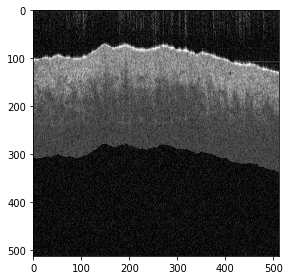

In [7]:
from ast import Num
TRAIN_PATH = '/content/drive/MyDrive/Colab_Notebooks/train/'
TEST_PATH = '/content/drive/MyDrive/Colab_Notebooks/test/'

train_ids = next(os.walk(TRAIN_PATH))[2]
test_ids = next(os.walk(TEST_PATH))[2]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH), dtype=np.uint16)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH), dtype=np.bool) 

print('Resizing training images and masks')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_ 
    if (path[-3::]) == 'pgm':
      name1=path[:45]
      name2=path[45:-8]
      m1=path[-8:-4]
      mth=int(m1)
      mth=mth/4
      m2=str(mth)
      while len(m2)<6:
        m2='0'+m2
      m3=path[:-8] + m2[:-2] + '.png'

      print(path)
      img = imread(path)[:,:]  
      #img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
      X_train[n] = img  #Fill empty X_train with values from img
    
    #for mask_file in next(os.walk(path + '/masks/'))[2]:
      mpath = name1 + "mask/" + name2 + m2[:-2] + '.png'
      mask_ = imread(mpath)
      for k in range(IMG_HEIGHT):
        for i in range(IMG_WIDTH):
          if mask_[k][i]<128 :
            mask_[k][i] = 0
      #mask_ = resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    #mask = np.maximum(mask, mask_)  
      print(m3)
      Y_train[n] = mask_
    

# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH), dtype=np.uint16)
Y_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH), dtype=np.uint16)
sizes_test = []

print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path)[:,:]
    #img = imread(path + '/images/' + id_ +'.pgm')[:,:]
    sizes_test.append([img.shape[0], img.shape[1]])
    #img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):   
    path = TEST_PATH + id_ 
    if (path[-3::]) == 'pgm':
      name1=path[:44]
      name2=path[44:-8]
      m1=path[-8:-4]
      mth=int(m1)
      mth=mth/4
      m2=str(mth)
      while len(m2)<6:
        m2='0'+m2
      m3=path[:-8] + m2[:-2] + '.png'

      print(path)
      img = imread(path)[:,:]  
      #img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
      X_train[n] = img  #Fill empty X_train with values from img
    
    #for mask_file in next(os.walk(path + '/masks/'))[2]:
      mpath = name1 + "mask/" + name2 + m2[:-2] + '.png'
      test_mask = imread(mpath)
      for k in range(IMG_HEIGHT):
        for i in range(IMG_WIDTH):
          if test_mask[k][i] <128 :
            test_mask[k][i] = 0
      #mask_ = resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    #mask = np.maximum(mask, mask_)  
      print(m3)
      Y_test[n] = test_mask


print('Done!')

image_x = random.randint(0, len(train_ids)) - 1 #not sure
imshow(X_train[image_x])
plt.show()
#imshow(np.squeeze(Y_train[image_x]))
#plt.show()



In [8]:

bri1 = np.zeros((len(train_ids) ,IMG_WIDTH, 2), dtype=np.uint32)
bri2 = np.zeros((len(train_ids) ,IMG_WIDTH, 2), dtype=np.uint32)
for i in range(len(train_ids)):
  b1=0
  for k in range(IMG_WIDTH):
    b1=0
    for q in range(IMG_HEIGHT):
      if b1==0 and Y_train[i][q][k]==True :
        bri1[i][k][0] = q 
        bri1[i][k][1] = k  
        b1=b1+1

      if b1==1 and Y_train[i][q][k]==False :
        bri2[i][k][0] = q -1
        bri2[i][k][1] = k
        b1=0
        break


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.spatial.distance import directed_hausdorff
import math
import numpy as np


In [10]:
y=directed_hausdorff(bri1[1], bri2[1])[0]
hd=0
mx1=0
mn1=999
x1=np.zeros((512), dtype=np.float16)
x2=np.zeros((512), dtype=np.float16)

def cal_distance(p1, p2):
    if p2[0] >= p1[0] and p2[1] >= p1[1]:
      return math.sqrt(math.pow(((p2[0] - p1[0])), 2) + math.pow(((p2[1] - p1[1])), 2))
    if p2[0] > p1[0] and p2[1] < p1[1]:
      return math.sqrt(math.pow(((p2[0] - p1[0])), 2) + math.pow(((p1[1] - p2[1])), 2))
    if p2[0] <= p1[0] and p2[1] <= p1[1]:
      return math.sqrt(math.pow(((p1[0] - p2[0])), 2) + math.pow(((p1[1] - p2[1])), 2))
    if p2[0] < p1[0] and p2[1] > p1[1]:
      return math.sqrt(math.pow(((p1[0] - p2[0])), 2) + math.pow(((p2[1] - p1[1])), 2)) 

for k in range(512):
  for i in range(512):
    x1[i]=cal_distance (bri1[1][k], bri2[1][i])
  x2[k]=np.min(x1)
hd=np.max(x2)
print(hd,y)
print(len(Y_train))

 


48.88 48.877397639399746
21


In [11]:
from keras import backend as K
def recall(y_true,y_pred):                          
    #y_true = K.ones_like(y_true)                              
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true,y_pred):
    #y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def dice(y_true,y_pred):
    #y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))   
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    dice = true_positives*2 / (predicted_positives + all_positives + K.epsilon())
    return dice
    #y_true = K.ones_like(y_true)
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))
    
def iou(y_true,y_pred):    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))   
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    iou = true_positives / (predicted_positives + all_positives - true_positives + K.epsilon())
    return iou

In [12]:
def IoU_coef(y_true, y_pred):
    T = K.flatten(y_true)
    P = K.flatten(y_pred)
    intersection = K.sum(T * P)
    IoU = (intersection + 1.0) / (K.sum(T) + K.sum(P) - intersection + 1.0)
    return IoU
def IoU_loss(y_true, y_pred):
    return -IoU_coef(y_true, y_pred)

In [13]:
def h_dis(y_true, y_pred):
  sum=0
  sum1=0
  
  bri1 = np.zeros((len(y_true) ,IMG_WIDTH, 2), dtype=np.uint32)
  bri2 = np.zeros((len(y_true) ,IMG_WIDTH, 2), dtype=np.uint32)
  x1=np.zeros((512), dtype=np.float16)
  x2=np.zeros((512), dtype=np.float16)
  x3=np.zeros((len(y_true)),dtype=np.float16)
  for i in range(len(y_true)):
    b1=0
    for k in range(IMG_WIDTH):
      b1=0
      sum1=sum1+1
      for q in range(IMG_HEIGHT):
        if b1==0 and y_true[i][q][k]==True :
          bri1[i][k][0] = q 
          bri1[i][k][1] = k  
          b1=b1+1
          sum=sum+1

        if b1==1 and y_pred[i][q][k]==False :
          bri2[i][k][0] = q -1
          bri2[i][k][1] = k
          sum=sum+1
          b1=0
          break
  for q in range(len(y_true)):
    for k in range(512):
      for i in range(512):
        x1[i]=cal_distance (bri1[1][k], bri2[1][i])
      x2[k]=np.min(x1)
    x3[q]=np.max(x2)
  return np.mean(x3)

In [14]:
def cdist(A, B):
    """
    Computes the pairwise Euclidean distance matrix between two tensorflow matrices A & B, similiar to scikit-learn cdist.
    For example:
    A = [[1, 2],
         [3, 4]]
    B = [[1, 2],
         [3, 4]]
    should return:
        [[0, 2.82],
         [2.82, 0]]
    :param A: m_a x n matrix
    :param B: m_b x n matrix
    :return: euclidean distance matrix (m_a x m_b)
    """
    # squared norms of each row in A and B
    na = tf.reduce_sum(tf.square(A), 1)
    nb = tf.reduce_sum(tf.square(B), 1)

    # na as a row and nb as a co"lumn vectors
    na = tf.reshape(na, [-1, 1])
    nb = tf.reshape(nb, [1, -1])

    # return pairwise euclidead difference matrix
    D = tf.sqrt(tf.maximum(na - 2 * tf.matmul(A, B, False, True) + nb, 0.0))
    return 

In [15]:
from sklearn.utils.extmath import cartesian

def weighted_hausdorff_distance(w, h):
    all_img_locations = tf.convert_to_tensor(cartesian([np.arange(w),np.arange(h)]), dtype=tf.float32)
    max_dist = math.sqrt(w ** 2 + h ** 2)
    
    def hausdorff_loss(y_true, y_pred):
        def loss(y_true, y_pred):
            eps = 1e-6
            y_true = K.reshape(y_true, [w, h])
            gt_points = K.cast(tf.where(y_true > 0.5), dtype=tf.float32)
            num_gt_points = tf.shape(gt_points)[0]
            y_pred = K.flatten(y_pred)
            p = y_pred
            p_replicated = tf.squeeze(K.repeat(tf.expand_dims(p, axis=-1), 
                                                num_gt_points))
            d_matrix = cdist(all_img_locations, gt_points)
            num_est_pts = tf.reduce_sum(p)
            term_1 = (1 / (num_est_pts + eps)) * K.sum(p * K.min(d_matrix, 1))

            d_div_p = K.min((d_matrix + eps) / (p_replicated ** 95 + (eps / max_dist)), 0)
            d_div_p = K.clip(d_div_p, 0, max_dist)
            term_2 = K.mean(d_div_p, axis=0)

            return term_1 + term_2

        batched_losses = tf.map_fn(lambda x:
                                   loss(x[0], x[1]),
                                   (y_true, y_pred),
                                   dtype=tf.float32)
        return K.mean(tf.stack(batched_losses))

    return hausdorff_loss

In [16]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = label(y_true_in > 0.65)
    y_pred = label(y_pred_in > 0.65)
    
    true_objects = len(np.unique(labels))
    pred_objects = len(np.unique(y_pred))

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        true_negatives = np.sum(matches, axis=0) == 1  # Correct background
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.array(np.mean(metric), dtype=np.float32)

def my_iou_metric(label, pred):
    metric_value = tf.py_function(iou_metric_batch, [label, pred], tf.float32)
    return metric_value

In [17]:
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [18]:
def my_iou_metric_mean(label, pred):
    metric_value = tf.py_function(mean_iou, [label, pred], tf.float32)
    return metric_value

In [19]:
def iou_metric_dice(y_true_in, y_pred_in, print_table=False):
    labels = label(y_true_in > 0.65)
    y_pred = label(y_pred_in > 0.65)
    
    true_objects = len(np.unique(labels))
    pred_objects = len(np.unique(y_pred))

    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection

    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        true_negatives = np.sum(matches, axis=0) == 1  # Correct background
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp*2 / (tp*2 + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch_dice(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric_dice(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.array(np.mean(metric), dtype=np.float32)

def my_iou_metric_dice(label, pred):
    metric_value = tf.py_function(iou_metric_batch_dice, [label, pred], tf.float32)
    return metric_value

# U-net建置

In [20]:
import time
time_start = time.time()

In [21]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from tensorflow.python.saved_model import loader_impl
from tensorflow.python.keras.saving.saved_model import load as saved_model_load
epoch1=150
maxdice=0
SUM=0

fk = KFold(n_splits=10, shuffle=True)
for trn, tst in fk.split(X_train) :
  print(trn)
  print(tst)
  print("---")
  trn1=trn.size 
  tst1=tst.size 
  xtrain = np.zeros((trn1, IMG_HEIGHT, IMG_WIDTH), dtype=np.uint16)
  ytrain = np.zeros((trn1, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool) 
  xtest = np.zeros((tst1, IMG_HEIGHT, IMG_WIDTH), dtype=np.uint16)
  ytest = np.zeros((tst1, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool) 
  for k in range(trn1)  :
    xtrain[k]=(X_train[trn[k]])
    ytrain[k]=(Y_train[trn[k]])
  for k in range(tst1):
    xtest[k]=(X_train[tst[k]])
    ytest[k]=(Y_train[tst[k]])

  inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, 1)) 
  s = tf.keras.layers.Lambda(lambda x: x / 10000)(inputs)
  print('lambda',s)

  #Contraction path
  c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
  c1 = tf.keras.layers.Dropout(0.1)(c1)
  c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
  p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
  c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
  c2 = tf.keras.layers.Dropout(0.1)(c2)
  c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
  p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
  
  c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
  c3 = tf.keras.layers.Dropout(0.2)(c3)
  c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
  p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
  
  c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
  c4 = tf.keras.layers.Dropout(0.2)(c4)
  c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
  p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
  
  c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
  c5 = tf.keras.layers.Dropout(0.3)(c5)
  c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

  #Expansive path 
  u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
  u6 = tf.keras.layers.concatenate([u6, c4])
  c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
  c6 = tf.keras.layers.Dropout(0.2)(c6)
  c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
  
  u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
  u7 = tf.keras.layers.concatenate([u7, c3])
  c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
  c7 = tf.keras.layers.Dropout(0.2)(c7)
  c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
  
  u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
  u8 = tf.keras.layers.concatenate([u8, c2])
  c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
  c8 = tf.keras.layers.Dropout(0.1)(c8)
  c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
  
  u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
  u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
  c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
  c9 = tf.keras.layers.Dropout(0.1)(c9)
  c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
  
  outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
  
  model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
  #lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3,decay_steps=1000,decay_rate=0.2)
  #opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  opt = tf.keras.optimizers.Adam(learning_rate=0.0004)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', precision, recall, dice])
  #model.summary()
  #tf.keras.utils.plot_model(model, to_file='model.png')
  callbacks = [
        #tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]
  results = model.fit(xtrain, ytrain, validation_data=(xtest,ytest), batch_size=32, epochs=epoch1, callbacks=callbacks)
  if results.history['val_dice'][epoch1-1]>maxdice:
    maxdice=results.history['val_dice'][epoch1-1]
    model.save('/content/drive/MyDrive/Colab_Notebooks/ML_for_skin.hdf5')
    TRN=trn
    TST=tst
    SUM=SUM+1

print(maxdice)


####################################


[ 0  1  2  3  4  6  7  8  9 10 12 14 15 16 17 18 19 20]
[ 5 11 13]
---
lambda KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None), name='lambda/truediv:0', description="created by layer 'lambda'")


<ipython-input-21-bcc20b3eaf51>:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ytrain = np.zeros((trn1, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)
<ipython-input-21-bcc20b3eaf51>:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ytest = np.zeros((tst1, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)


Epoch 1/150
1/1 [==============================] - 19s 19s/step - loss: 0.8628 - accuracy: 0.5518 - precision: 0.0748 - recall: 0.4362 - dice: 0.1278 - val_loss: 0.5681 - val_accuracy: 0.8785 - val_precision: 0.0228 - val_recall: 0.0161 - val_dice: 0.0189
Epoch 2/150
1/1 [==============================] - 1s 743ms/step - loss: 0.6789 - accuracy: 0.7483 - precision: 0.0727 - recall: 0.1995 - dice: 0.1066 - val_loss: 0.5766 - val_accuracy: 0.9199 - val_precision: 0.0314 - val_recall: 0.0035 - val_dice: 0.0063
Epoch 3/150
1/1 [==============================] - 1s 718ms/step - loss: 0.6370 - accuracy: 0.8483 - precision: 0.0701 - recall: 0.0828 - dice: 0.0759 - val_loss: 0.6045 - val_accuracy: 0.9261 - val_precision: 0.0354 - val_recall: 7.1895e-04 - val_dice: 0.0014
Epoch 4/150
1/1 [==============================] - 1s 731ms/step - loss: 0.6379 - accuracy: 0.8874 - precision: 0.0686 - recall: 0.0395 - dice: 0.0501 - val_loss: 0.6209 - val_accuracy: 0.9270 - val_precision: 0.0193 - val_rec

In [22]:
print(SUM)

2


In [23]:
time_end = time.time()
time_c = time_end - time_start
print('time cost',time_c , 's')

time cost 1378.3201961517334 s


# 對U-net訓練的結果作分析

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'dice', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_dice'])


<ipython-input-24-37ce1146cdb8>:9: MatplotlibDeprecationWarning: Unrecognized location 'under right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['train', 'validation'], loc='under right')


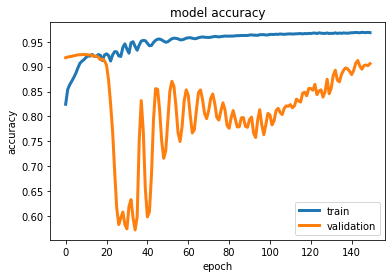

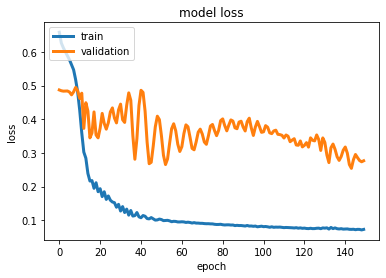

<ipython-input-24-37ce1146cdb8>:23: MatplotlibDeprecationWarning: Unrecognized location 'under right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['precision', 'recall'], loc='under right')


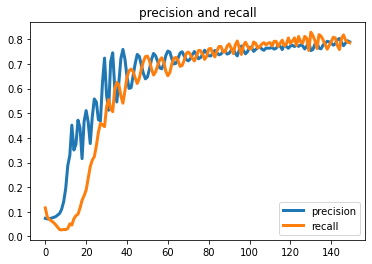

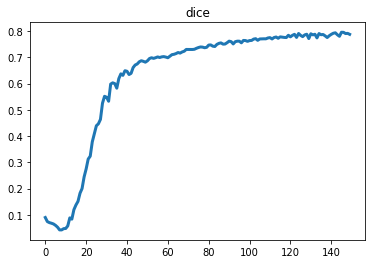

0.0076973349787294865


In [24]:

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/ML_for_skin.hdf5', custom_objects={'precision': precision, 'recall': recall, 'dice': dice})
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'], linewidth=3)
plt.plot(results.history['val_accuracy'], linewidth=3)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='under right')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'], linewidth=3)
plt.plot(results.history['val_loss'], linewidth=3)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(results.history['precision'], linewidth=3)
plt.plot(results.history['recall'], linewidth=3)
plt.title('precision and recall')
plt.legend(['precision', 'recall'], loc='under right')
plt.show()
#n1 = my_iou_metric.numpy()


plt.plot(results.history['dice'], linewidth=3)
plt.title('dice')
plt.show()

print(results.history['val_dice'][4])


In [25]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/ML_for_skin.hdf5', custom_objects={'precision': precision, 'recall': recall, 'dice': dice})

In [26]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
print(TST)
tst_1 = TST.tolist()
print(tst_1)
print(TRN)


[ 1 12]
[1, 12]
[ 0  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20]


In [28]:
idx = random.randint(0, len(X_train))

preds_train = model.predict(X_train[TRN], verbose=1)
preds_val = model.predict(X_train[TST], verbose=1)
preds_test = model.predict(X_test, verbose=1) #為何維度改變

preds_train_t = (preds_train > 0.5).astype(np.uint16)
preds_val_t = (preds_val > 0.5).astype(np.uint16)
preds_test_t = (preds_test > 0.5).astype(np.uint16)
#20211201

val_Y=Y_train[TST]
val_Y= np.where(val_Y>0 ,65535,0)
Y_train=Y_train[TRN]
Y_train = np.where(Y_train>0 ,65535,0)
preds_train_t = np.where(preds_train_t > 0.5,65535,0)
preds_val_t = np.where(preds_val_t > 0.5,65535,0)
preds_test_t = np.where(preds_test_t > 0.5,65535,0)
dermis_line=preds_train_t.copy()
dermis_line_matlab=Y_train.copy()
dermis_linet=preds_test_t.copy()
np.shape(dermis_line)
np.shape(dermis_linet)
np.shape(preds_val_t)
np.shape(preds_test_t)


1/1 [==============================] - 2s 2s/step


(19, 512, 512, 1)

(10, 512, 512, 1)

(2, 512, 512, 1)

(10, 512, 512, 1)

In [29]:
TST1=[0]*len(TST)
for k in range(len(TST)):
  TST1[k]=train_ids[TST[k]]

print(TST1)

['alan_face1_173645_0068.pgm', 'alan_face1_173645_0388.pgm']


# 接下來是validation的部分
包含了

1.顯示validation的OAC影像、Ground Truth、Prediction的結果，以利我們快速進行學習好壞的判斷

2.validation_iou overall結果紀錄在excel中並下載下來

3.個別的validation_iou繪製成圖，以利我們快速進行學習好壞的判斷

4.validation precision, recall, iou 計算並將結果紀錄在excel中並下載下來

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

alan_face1_173645_0388.pgm
1


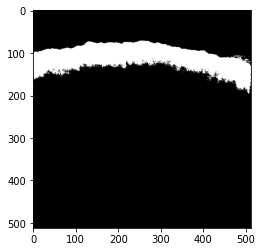

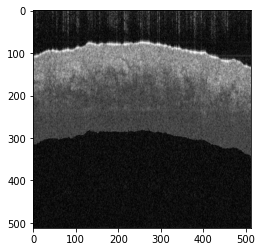

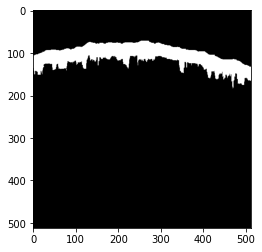

In [30]:
#validation 
val_X=X_train[TST]

iv = random.randint(0, len(preds_val_t)-1)

plt.figure(10)
plt.imshow(np.squeeze(preds_val_t[iv]), vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('validation_ML_mask_image.png',np.squeeze(preds_val_t[iv]), vmin = 0, vmax = 65535, cmap = 'seismic')

plt.figure(11)
plt.imshow(val_X[iv], vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('validation_oct_image.png',val_X[iv], vmin = 0, vmax = 65535, cmap = 'gray')

plt.figure(12)
plt.imshow(np.squeeze(val_Y[iv]), vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('validation_GT_mask_image.png',np.squeeze(val_Y[iv]), vmin = 0, vmax = 65535, cmap = 'PRGn')

validation_ids=TST1 
print(validation_ids[iv])
print(iv)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


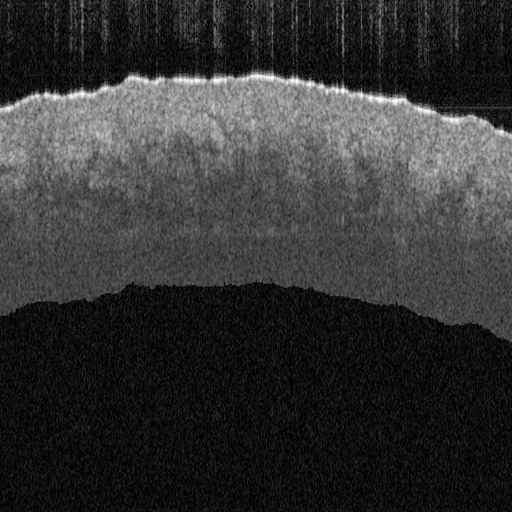

array([[[63, 17, 17],
        [89, 43, 43],
        [76, 31, 31],
        ...,
        [68, 22, 22],
        [84, 39, 39],
        [69, 23, 23]],

       [[68, 22, 22],
        [78, 32, 32],
        [78, 32, 32],
        ...,
        [64, 18, 18],
        [72, 26, 26],
        [63, 17, 17]],

       [[73, 27, 27],
        [72, 26, 26],
        [80, 34, 34],
        ...,
        [64, 19, 19],
        [64, 19, 19],
        [55,  9,  9]],

       ...,

       [[68, 22, 22],
        [56, 10, 10],
        [73, 27, 27],
        ...,
        [58, 13, 13],
        [65, 20, 20],
        [55,  9,  9]],

       [[70, 24, 24],
        [59, 14, 14],
        [69, 23, 23],
        ...,
        [58, 13, 13],
        [61, 15, 15],
        [60, 14, 14]],

       [[64, 18, 18],
        [57, 12, 12],
        [57, 12, 12],
        ...,
        [55,  9,  9],
        [55,  9,  9],
        [68, 22, 22]]], dtype=uint8)

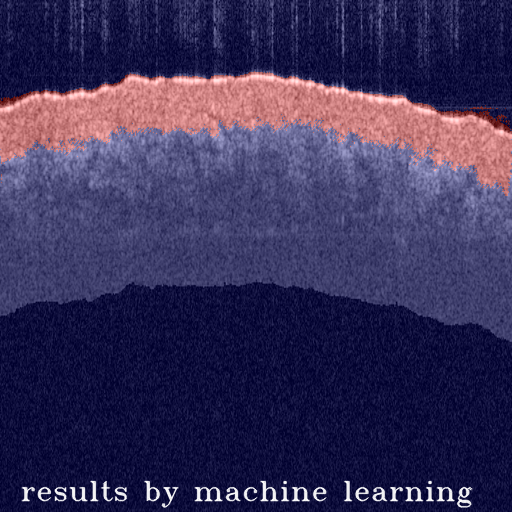

array([[[ 77,  17,  68],
        [103,  43,  94],
        [ 91,  31,  82],
        ...,
        [ 82,  22,  74],
        [ 99,  39,  90],
        [ 83,  23,  75]],

       [[ 82,  22,  74],
        [ 92,  32,  84],
        [ 92,  32,  84],
        ...,
        [ 78,  18,  69],
        [ 86,  26,  77],
        [ 77,  17,  68]],

       [[ 87,  27,  78],
        [ 86,  26,  77],
        [ 94,  34,  85],
        ...,
        [ 79,  19,  70],
        [ 79,  19,  70],
        [ 69,   9,  60]],

       ...,

       [[ 82,  22,  74],
        [ 70,  10,  61],
        [ 87,  27,  78],
        ...,
        [ 73,  13,  64],
        [ 80,  20,  71],
        [ 69,   9,  60]],

       [[ 84,  24,  76],
        [ 74,  14,  65],
        [ 83,  23,  75],
        ...,
        [ 73,  13,  64],
        [ 75,  15,  66],
        [ 74,  14,  66]],

       [[ 78,  18,  69],
        [ 72,  12,  63],
        [ 72,  12,  63],
        ...,
        [ 69,   9,  60],
        [ 69,   9,  60],
        [ 82,  22,  74]]

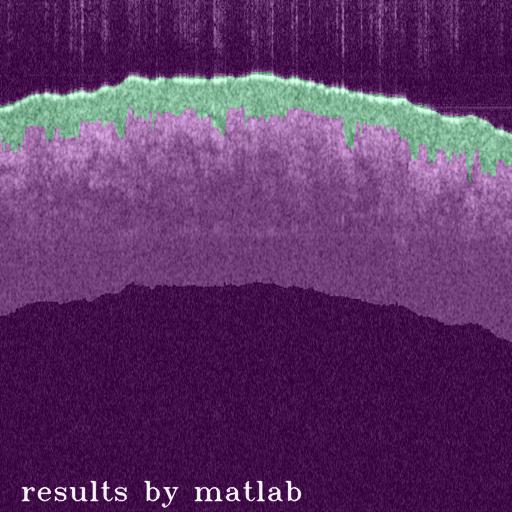

True

True


alan_face1_173645_0388.pgm


In [31]:
#validation
import cv2
from google.colab.patches import cv2_imshow
top_pic = 'validation_oct_image.png'
middle_pic = 'validation_GT_mask_image.png'
bottom_pic = 'validation_ML_mask_image.png'

top = cv2.imread(top_pic)
middle = cv2.imread(middle_pic)
bottom = cv2.imread(bottom_pic)
print(np.shape(bottom))
print(np.shape(middle))
print(np.shape(top))
cv2_imshow(top)
overlapping = cv2.addWeighted(bottom, 0.6 ,top, 0.9, 0)
cv2.putText(overlapping, 'results by machine learning', (20, 500), cv2.FONT_HERSHEY_TRIPLEX, 0.9, (255, 255, 255), 1, cv2.LINE_AA)
cv2_imshow(overlapping)
#plt.imshow(overlapping[:,:,[2,1,0]])
#plt.show()
overlapping2 = cv2.addWeighted(middle, 0.8 ,top, 0.9, 0)
cv2.putText(overlapping2, 'results by matlab', (20, 500), cv2.FONT_HERSHEY_TRIPLEX, 0.9, (255, 255, 255), 1, cv2.LINE_AA)
cv2_imshow(overlapping2)
#plt.imshow(overlapping2[:,:,[2,1,0]])
#plt.show()
cv2.imwrite('validation_ML_mask_'+ str(validation_ids[iv]) + '.png' , overlapping)
cv2.imwrite('validation_GT_mask_'+ str(validation_ids[iv]) + '.png', overlapping2)
print('\n' + validation_ids[iv])

In [32]:
#validation_iou overall
import openpyxl
from openpyxl import Workbook
excel_file = Workbook()
sheet = excel_file.active
sheet['A1'] = 'name'
sheet['B1'] = 'iou'

for k in range(len(preds_val_t)):
  A = np.squeeze(preds_val_t[k])
  B = np.squeeze(val_Y[k])
  intersection = np.logical_and(A, B)
  union = np.logical_or(A, B)
  iou = np.sum(intersection>0)/np.sum(union>0)
  cloumnA=str(validation_ids[k])
  sheet.append([cloumnA,iou])
  #print(str(validation_ids[iv]) + '\t=\t'+ str(iou))
  
excel_file.save('validation_iou.xlsx')

Text(60, 400, 'npixels = 27427')

Text(60, 400, 'npixels = 20075')

Text(60, 400, 'npixels = 19620')

Text(60, 400, 'npixels = 27882')

Text(0.5, 1.0, 'Predicted')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5, 1.0, 'GroundTruth')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5, 1.0, 'Intersection')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5, 1.0, 'Union')

(-0.5, 511.5, 511.5, -0.5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

validation_ML_mask_alan_face1_173645_0388.pgm.png


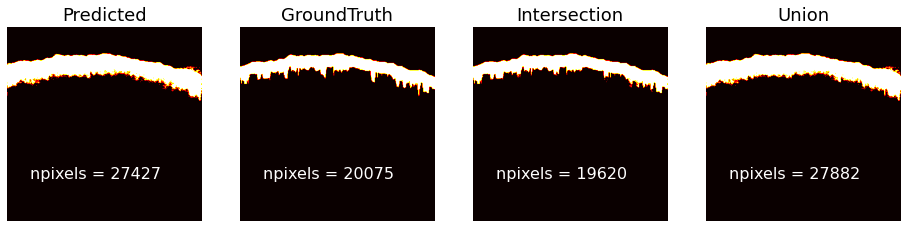

In [33]:
#validation_iou
for k in range(len(preds_val_t)):
  A = np.squeeze(preds_val_t[k])
  B = np.squeeze(val_Y[k])
  intersection = np.logical_and(A, B)
  union = np.logical_or(A, B)
  #iou = intersection/union
  #iou_recode.append=iou
  #interArea = tem - intersection


fig, axes = plt.subplots(1,4, figsize=(16,9))
axes[0].imshow(A, cmap='hot')
axes[0].annotate('npixels = {}'.format(np.sum(A>0)), 
                 xy=(60, 400), color='white', fontsize=16)
axes[1].imshow(B, cmap='hot')
axes[1].annotate('npixels = {}'.format(np.sum(B>0)), 
                 xy=(60, 400), color='white', fontsize=16)

axes[2].imshow(intersection, cmap='hot')
axes[2].annotate('npixels = {}'.format(np.sum(intersection>0)), 
                 xy=(60, 400), color='white', fontsize=16)

axes[3].imshow(union, cmap='hot')
axes[3].annotate('npixels = {}'.format(np.sum(union>0)), 
                 xy=(60, 400), color='white', fontsize=16)

labels = ['Predicted', 'GroundTruth', 'Intersection', 'Union']
for ind, ax in enumerate(axes):
    ax.set_title(labels[ind], fontsize=18)
    ax.axis('off')

plt.savefig('validation_iou_' + str(validation_ids[iv]) + '.png') 

from google.colab import files 
files.download('validation_ML_mask_'+ str(validation_ids[iv]) + '.png')
files.download('validation_GT_mask_'+ str(validation_ids[iv]) + '.png')
#files.download('epidermal thickness_'+ str(validation_ids[iv]) +'.txt')
files.download('validation_iou_' + str(validation_ids[iv]) + '.png')
print(('validation_ML_mask_'+ str(validation_ids[iv]) + '.png'))

In [34]:
#validation precision, recall, iou
from sklearn.metrics import confusion_matrix


ground_truth_labels = val_Y[iv].ravel()
preds_val_t2 = np.squeeze(preds_val_t)
predition_labels = preds_val_t2[iv].ravel()

r = confusion_matrix(y_true=ground_truth_labels, y_pred=predition_labels)
r = np.flip(r)

acc = (r[0][0] + r[-1][-1]) / np.sum(r)
print('acc='+str(acc))

iou = (r[0][0]) / (np.sum(r)-(r[-1][-1]))
print('iou='+ str(iou))

precision = r[0][0] / (r[0][0] + r[-1][0])
print('predition='+str(precision))

recall = r[0][0] / (r[0][0] + r[0][-1])
print('recall='+str(recall))

acc=0.9684829711914062
iou=0.7036797934151066
predition=0.7153534837933423
recall=0.97733499377335


In [35]:

all_ground_truth_labels = val_Y.ravel()
all_preds_val_t2 = np.squeeze(preds_val_t)
all_predition_labels = all_preds_val_t2.ravel()

r = confusion_matrix(y_true=all_ground_truth_labels, y_pred=all_predition_labels)
r = np.flip(r)

acc = (r[0][0] + r[-1][-1]) / np.sum(r)
print('acc='+str(acc))

iou = (r[0][0]) / (np.sum(r)-(r[-1][-1]))
print('iou='+ str(iou))

precision = r[0][0] / (r[0][0] + r[-1][0])
print('precision='+str(precision))

recall = r[0][0] / (r[0][0] + r[0][-1])
print('recall='+str(recall))

dice = 2*(precision*recall/(recall+precision))
print('dice='+str(dice))

acc=0.9642391204833984
iou=0.6627271091923008
precision=0.7132126609234343
recall=0.903497155189327
dice=0.7971567980439462


In [36]:
excel_file = Workbook()
sheet = excel_file.active
sheet['A1'] = 'name'
sheet['B1'] = 'acc'
sheet['C1'] = 'iou'
sheet['D1'] = 'predition'
sheet['E1'] = 'recall'

for iv in range(len(preds_val_t)):
  ground_truth_labels = val_Y[iv].ravel()
  preds_val_t2 = np.squeeze(preds_val_t)
  predition_labels = preds_val_t2[iv].ravel()
  r = confusion_matrix(y_true=ground_truth_labels, y_pred=predition_labels)
  r = np.flip(r)
  acc = (r[0][0] + r[-1][-1]) / np.sum(r)
  #print('acc='+str(acc))
  iou = (r[0][0]) / (np.sum(r)-(r[-1][-1]))
  #print('iou='+ str(iou))
  predition = r[0][0] / (r[0][0] + r[-1][0])
  #print('predition='+str(predition))
  recall = r[0][0] / (r[0][0] + r[0][-1])
  #print('recall='+str(recall))
  cloumnA=str(validation_ids[iv])
  sheet.append([cloumnA,acc,iou,predition,recall])
  #print(str(validation_ids[iv]) + '\t=\t'+ str(iou))
excel_file.save('validation_confusion_matrix.xlsx')

# 接下來是training的部分
包含了

1.顯示training的OAC影像、Ground Truth、Prediction的結果，以利我們快速進行學習好壞的判斷

2.根據機器學習的結果，找出表皮表面和表皮-真皮介面，也就是在matlab當中的紅線與藍線，並且繪製出來

3.將此繪製結果與Ground Truth做比較

4.training_iou overall結果紀錄在excel中並下載下來

5.training precision, recall, iou 計算並將結果紀錄在excel中並下載下來

6.個別的training_iou繪製成圖，以利我們快速進行學習好壞的判斷

<Figure size 432x288 with 0 Axes>

9


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

int64
(512, 512, 1)
alan_face1_173645_0308.pgm


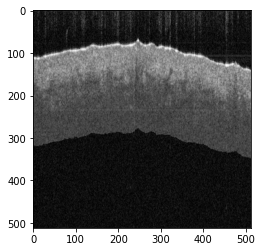

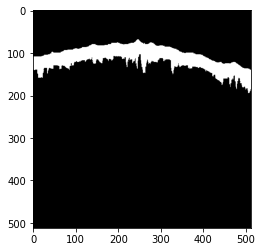

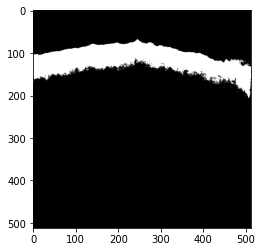

In [37]:
# Perform a sanity check on some random training samples
trn_X=X_train[TRN]


ix = random.randint(0, len(preds_train_t)-1)
plt.figure(1)
plt.imshow(trn_X[ix], vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('image.png',trn_X[ix], vmin = 0, vmax = 65535, cmap = 'gray')
#plt.savefig('X_train.png') #have grid
print(ix)
# plt.show()

plt.figure(2)
plt.imshow(np.squeeze(Y_train[ix]), vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('mask.png',np.squeeze(Y_train[ix]), vmin = 0, vmax = 65535, cmap = 'PRGn')
# plt.show()
#print(preds_train_t[0])
#imshow(X_train[int(X_train.shape[0]*0.8):][ix])
#plt.show()

plt.figure(3)
plt.imshow(np.squeeze(preds_train_t[ix]), vmin = 0, vmax = 65535, cmap = 'gray')
# plt.show()
plt.imsave('ML_mask.png',np.squeeze(preds_train_t[ix]), vmin = 0, vmax = 65535, cmap = 'seismic')
print(np.squeeze(preds_train_t[ix].dtype)) #squeeze去掉一個維度
#print(np.squeeze(preds_train_t[ix]))

##
print(np.shape(preds_train_t[ix]))
print(train_ids[ix])

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


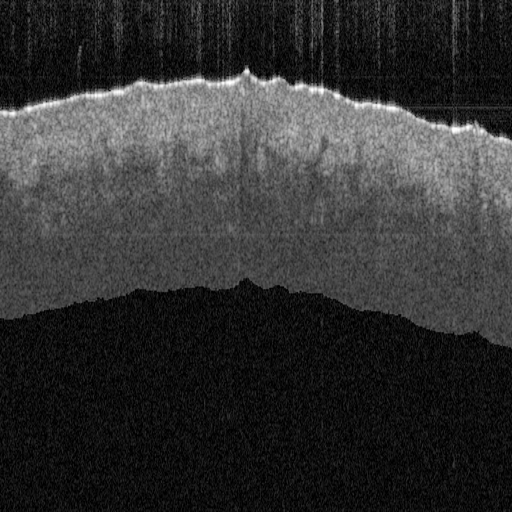

array([[[74, 29, 29],
        [57, 12, 12],
        [77, 32, 32],
        ...,
        [55,  9,  9],
        [51,  5,  5],
        [82, 36, 36]],

       [[76, 31, 31],
        [78, 32, 32],
        [74, 28, 28],
        ...,
        [74, 29, 29],
        [61, 15, 15],
        [69, 23, 23]],

       [[82, 36, 36],
        [89, 43, 43],
        [74, 28, 28],
        ...,
        [80, 34, 34],
        [74, 28, 28],
        [67, 22, 22]],

       ...,

       [[62, 16, 16],
        [54,  8,  8],
        [46,  0,  0],
        ...,
        [73, 27, 27],
        [51,  5,  5],
        [52,  6,  6]],

       [[71, 25, 25],
        [53,  7,  7],
        [46,  1,  1],
        ...,
        [78, 32, 32],
        [54,  8,  8],
        [56, 11, 11]],

       [[69, 23, 23],
        [46,  1,  1],
        [47,  2,  2],
        ...,
        [74, 29, 29],
        [58, 13, 13],
        [63, 17, 17]]], dtype=uint8)

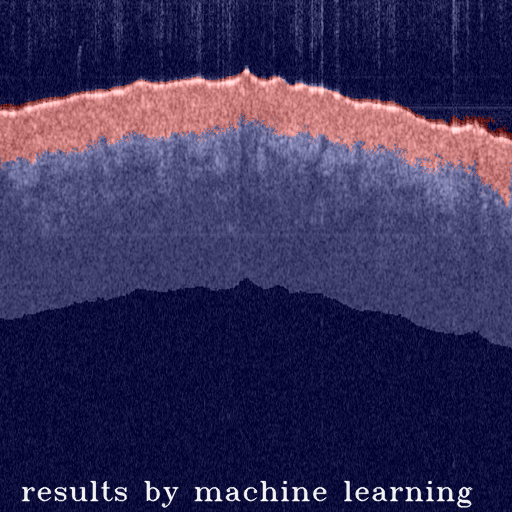

array([[[ 89,  29,  80],
        [ 72,  12,  63],
        [ 92,  32,  83],
        ...,
        [ 69,   9,  60],
        [ 65,   5,  57],
        [ 96,  36,  87]],

       [[ 91,  31,  82],
        [ 92,  32,  84],
        [ 88,  28,  79],
        ...,
        [ 89,  29,  80],
        [ 75,  15,  66],
        [ 83,  23,  75]],

       [[ 96,  36,  87],
        [103,  43,  94],
        [ 88,  28,  79],
        ...,
        [ 94,  34,  85],
        [ 88,  28,  79],
        [ 82,  22,  73]],

       ...,

       [[ 76,  16,  67],
        [ 68,   8,  59],
        [ 60,   0,  51],
        ...,
        [ 87,  27,  78],
        [ 65,   5,  57],
        [ 66,   6,  58]],

       [[ 85,  25,  76],
        [ 67,   7,  58],
        [ 61,   1,  52],
        ...,
        [ 92,  32,  84],
        [ 68,   8,  59],
        [ 71,  11,  62]],

       [[ 83,  23,  75],
        [ 61,   1,  52],
        [ 62,   2,  53],
        ...,
        [ 89,  29,  80],
        [ 73,  13,  64],
        [ 77,  17,  68]]

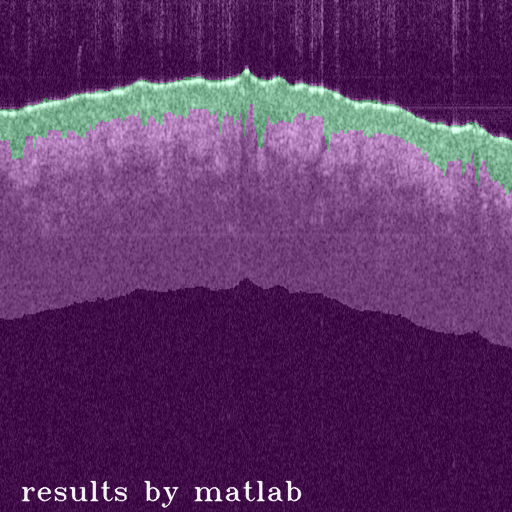

True

True


alan_face1_173645_0308.pgm


In [38]:
import cv2
from google.colab.patches import cv2_imshow
#from PIL import Image, ImageOps, ImageEnhance, PILLOW_VERSION 
#colormap = plt.get_cmap('inferno')
#heatmap = (colormap(preds_train_t[ix]) * 2**16).astype(np.uint16)[:,:,:3]
#heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)
#heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HOT) #wrong
#cv2_imshow(preds_train_t[ix])
#cv2_imshow(heatmap)
#cv2.waitKey()

top_pic = 'image.png'
middle_pic = 'mask.png'
bottom_pic = 'ML_mask.png'

top = cv2.imread(top_pic)
middle = cv2.imread(middle_pic)
bottom = cv2.imread(bottom_pic)
print(np.shape(bottom))
print(np.shape(middle))
print(np.shape(top))
cv2_imshow(top)
overlapping = cv2.addWeighted(bottom, 0.6 ,top, 0.9, 0)
cv2.putText(overlapping, 'results by machine learning', (20, 500), cv2.FONT_HERSHEY_TRIPLEX, 0.9, (255, 255, 255), 1, cv2.LINE_AA)
cv2_imshow(overlapping)
#plt.imshow(overlapping[:,:,[2,1,0]])
#plt.show()
overlapping2 = cv2.addWeighted(middle, 0.8 ,top, 0.9, 0)
cv2.putText(overlapping2, 'results by matlab', (20, 500), cv2.FONT_HERSHEY_TRIPLEX, 0.9, (255, 255, 255), 1, cv2.LINE_AA)
cv2_imshow(overlapping2)
#plt.imshow(overlapping2[:,:,[2,1,0]])
#plt.show()
cv2.imwrite('output_ML_mask_'+ str(train_ids[ix]) + '.png' , overlapping)
cv2.imwrite('output_mask_'+ str(train_ids[ix]) + '.png', overlapping2)
print('\n' + train_ids[ix])

(512, 1)

Text(0.5, 1.0, 'Epidermal line for alan_face1_173645_0308.pgm by machine learning')

Text(0, 0.5, 'position(pixel)')

Text(0.5, 0, 'line')

(1.0, 512.0)

(5.0, 300.0)

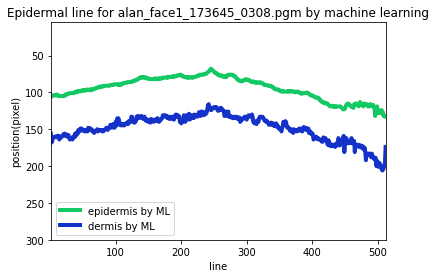

(512, 1)

(512, 1)


epidermal thickness by machine learning: 160.68559550561795 μm


In [39]:
#ML_MASK_results

#draw upper line
eprdermis_line=np.empty(512)
eprdermis_line=np.argmax(preds_train_t,axis=1) #y_plot
x_plot_e = np.arange(512) + 1
#index = [0]
#x_plot = np.delete(x_plot,index) 
y_plot_e=np.zeros(512)
y_plot_e = eprdermis_line[ix][:]
#print(y_plot)
#print(eprdermis_line[1])
#plt.plot(x_plot_e, y_plot_e,color=(20/255,200/255,100/255),linewidth=3)
#plt.gca().invert_yaxis()
#plt.title("ixth surface line") # title
#plt.ylabel("position(pixel)") # y label
#plt.xlabel("line") # x label
#plt.xlim(1,512)
#plt.show()
np.shape(eprdermis_line[ix])

#draw under line
dermis_line_reverse=list(reversed(dermis_line[ix]))
y_plot_d=np.empty(512)
y_plot_d=np.argmax(dermis_line_reverse,axis=0)
y_plot_d=abs(y_plot_d - 511)
x_plot_d=np.arange(512)+1
#plt.plot(x_plot_d, y_plot_d,color=(100/255,100/255,200/255),linewidth=3)
#plt.gca().invert_yaxis()
#plt.title("ixth EDJ line") # title
#plt.ylabel("position(pixel)") # y label
#plt.xlabel("line") # x label
#plt.xlim(1,512)
#plt.show()

#combine
plt.plot(x_plot_e, y_plot_e,color=(20/255,200/255,100/255),linewidth=4, label="epidermis by ML")
plt.plot(x_plot_d, y_plot_d,color=(20/255,50/255,200/255),linewidth=4, label="dermis by ML")
plt.title("Epidermal line for " + str(train_ids[ix]) + " by machine learning") # title
plt.legend(loc="lower left")
plt.ylabel("position(pixel)") # y label
plt.xlabel("line") # x label
plt.xlim(1,512)
plt.ylim(5,300)
plt.gca().invert_yaxis()
plt.savefig('ML plot_' + str(train_ids[ix]) + '.png') 
plt.show()

ratio_adjust=0.72 #370->512
np.shape(y_plot_d)
np.shape(y_plot_e)
pixel_size=5.92*ratio_adjust/1.424
epidermis_thickness=y_plot_d-y_plot_e
epidermis_thickness=np.sort(epidermis_thickness,axis=None)
#print(epidermis_thickness)
epidermis_thickness=epidermis_thickness[55:455] # 80%

print('\n''epidermal thickness by machine learning:',np.average(np.squeeze(epidermis_thickness))*pixel_size,'μm') #mean

Text(0.5, 1.0, 'Comparison epidermis for alan_face1_173645_0308.pgm')

Text(0, 0.5, 'position(pixel)')

Text(0.5, 0, 'line')

(1.0, 512.0)

(5.0, 300.0)

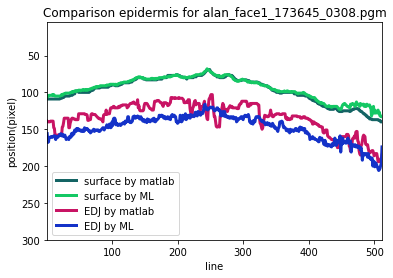


epidermis thickness by machine learning:160.69μm

epidermis thickness by matlab:106.22μm


In [40]:
#MASK_results_by_matlab v.s.ML_MASK

eprdermis_line_matlab=np.empty(512)
eprdermis_line_matlab=np.argmax(Y_train,axis=1) #y_plot
x_plot_e_matlab = np.arange(512) + 1
y_plot_e_matlab = np.zeros(512)
y_plot_e_matlab = eprdermis_line_matlab[ix][:]
#plt.plot(x_plot_e_matlab, y_plot_e_matlab,color=(20/255,100/255,100/255),linewidth=3)
#plt.plot(x_plot_e, y_plot_e,color=(200/255,20/255,100/255),linewidth=3)
#plt.gca().invert_yaxis()
#plt.title("ixth surface line matlab:green, ML:red") # title
#plt.ylabel("position(pixel)") # y label
#plt.xlabel("line") # x label
#plt.xlim(1,512)
#plt.show()

#draw under line
dermis_line_reverse_matlab=list(reversed(dermis_line_matlab[ix]))
y_plot_d_matlab=np.empty(512)
y_plot_d_matlab=np.argmax(dermis_line_reverse_matlab,axis=0)
y_plot_d_matlab=abs(y_plot_d_matlab - 511)
x_plot_d_matlab=np.arange(512)+1
#plt.plot(x_plot_d_matlab, y_plot_d_matlab,color=(20/255,100/255,100/255),linewidth=3)
#plt.plot(x_plot_d, y_plot_d,color=(200/255,20/255,100/255),linewidth=3)
#plt.gca().invert_yaxis()
#plt.title("ixth EDJ line matlab:green, ML:red") # title
#plt.ylabel("position(pixel)") # y label
#plt.xlabel("line") # x label
#plt.xlim(1,512)
#plt.show()

#combine
plt.plot(x_plot_e_matlab, y_plot_e_matlab,color=(20/255,100/255,100/255),linewidth=3, label="surface by matlab")
plt.plot(x_plot_e, y_plot_e,color=(20/255,200/255,100/255),linewidth=3, label="surface by ML")
plt.plot(x_plot_d_matlab, y_plot_d_matlab,color=(200/255,20/255,100/255),linewidth=3, label="EDJ by matlab")
plt.plot(x_plot_d, y_plot_d,color=(20/255,50/255,200/255),linewidth=3, label="EDJ by ML")
plt.legend(loc="lower left")
plt.title("Comparison epidermis for " + str(train_ids[ix]) ) # title
plt.ylabel("position(pixel)") # y label
plt.xlabel("line") # x label
plt.xlim(1,512)
plt.ylim(5,300)
plt.gca().invert_yaxis()
plt.savefig('Comparison plot_' + str(train_ids[ix]) + '.png') 
plt.show()

#comparison and caculate
epidermis_thickness_matlab=y_plot_d_matlab - y_plot_e_matlab

epidermis_thickness_matlab=np.sort(epidermis_thickness_matlab,axis=None)
#print(epidermis_thickness)
epidermis_thickness_matlab=epidermis_thickness_matlab[55:455] #80%
EP_mean_ML=np.average(np.squeeze(epidermis_thickness))*pixel_size
EP_mean_MATLAB=np.average(np.squeeze(epidermis_thickness_matlab))*pixel_size
print('\n''epidermis thickness by machine learning:'+ '%.2f' %EP_mean_ML +'μm') #mean
print('\n''epidermis thickness by matlab:'+'%.2f' %EP_mean_MATLAB +'μm') #mean

path = 'epidermal thickness_'+ str(train_ids[ix]) +'.txt'
f = open( path, 'w')
print('\n''epidermis thickness by machine learning:'+ '%.2f' %EP_mean_ML +'μm', file = f) #mean
print('\n''epidermis thickness by matlab:'+'%.2f' %EP_mean_MATLAB +'μm', file = f) #mean
f.close()

In [41]:
#hausdorff distance
hd=0
hdsum=0
hd95=0
hd95sum=0
assd=0
assdsum=0



for q in range(len(preds_train_t)):
  x1=np.zeros((512), dtype=np.float16)
  x2=np.zeros((2048), dtype=np.float16)

  bri1 = np.zeros((IMG_WIDTH, 2), dtype=np.uint32)
  bri2 = np.zeros((IMG_WIDTH, 2), dtype=np.uint32)

  dermis_line_reverse=list(reversed(dermis_line[q]))
  y_plot_d=np.empty(512)
  y_plot_d=np.argmax(dermis_line_reverse,axis=0)
  y_plot_d=abs(y_plot_d - 511)
  x_plot_d = np.arange(512) + 1


  dermis_line_reverse_matlab=list(reversed(dermis_line_matlab[q]))
  y_plot_d_matlab=np.empty(512)
  y_plot_d_matlab=np.argmax(dermis_line_reverse_matlab,axis=0)
  y_plot_d_matlab=abs(y_plot_d_matlab - 511)
  x_plot_d_matlab=np.arange(512)+1

  eprdermis_line=np.empty(512)
  eprdermis_line=np.argmax(preds_train_t,axis=1) #y_plot
  x_plot_e = np.arange(512) + 1
  y_plot_e=np.zeros(512)
  y_plot_e = eprdermis_line[q]

  eprdermis_line_matlab=np.empty(512)
  eprdermis_line_matlab=np.argmax(Y_train,axis=1) #y_plot
  x_plot_e_matlab = np.arange(512) + 1
  y_plot_e_matlab = np.zeros(512)
  y_plot_e_matlab = eprdermis_line_matlab[q]

  for k in range(IMG_WIDTH):
        
          bri1[k][0] = y_plot_d_matlab[k]
          bri1[k][1] = x_plot_d_matlab[k]

  for k in range(IMG_WIDTH):
        
          bri2[k][0] = y_plot_d[k]
          bri2[k][1] = x_plot_d[k]

  for k in range(512):
    for i in range(512):
      x1[i]=cal_distance (bri1[k], bri2[i])
    x2[k]=np.min(x1)
  for k in range(512):
    for i in range(512):
      x1[i]=cal_distance (bri2[k], bri1[i])
    x2[511+k]=np.min(x1)

  for k in range(IMG_WIDTH):
        
          bri1[k][0] = y_plot_e_matlab[k]
          bri1[k][1] = x_plot_e_matlab[k]

  for k in range(IMG_WIDTH):
        
          bri2[k][0] = y_plot_e[k]
          bri2[k][1] = x_plot_e[k]

  for k in range(512):
    for i in range(512):
      x1[i]=cal_distance (bri1[k], bri2[i])
    x2[1023+k]=np.min(x1)
  for k in range(512):
    for i in range(512):
      x1[i]=cal_distance (bri2[k], bri1[i])
    x2[1535+k]=np.min(x1)  

  assdsum=assdsum+np.mean(x2)
  assd=np.mean(x2)
  print("assd=", assd)

  hdsum=hdsum+np.max(x2)
  hd=np.max(x2)
  print('hd=', hd)

  x2=np.sort(x2)
  hd95sum=hd95sum+x2[1946]


hd=hdsum/len(preds_train_t)
hd95=hd95sum/len(preds_train_t)
assd=assdsum/len(preds_train_t)

print(hd)
print(hd95)
print(assd)


assd= 9.24
hd= 97.2
assd= 9.984
hd= 35.06
assd= 14.984
hd= 110.0
assd= 15.88
hd= 40.53
assd= 16.33
hd= 44.03
assd= 15.87
hd= 39.4
assd= 16.0
hd= 38.6
assd= 16.9
hd= 42.6
assd= 28.84
hd= 60.53
assd= 6.785
hd= 24.08
assd= 6.67
hd= 32.12
assd= 6.824
hd= 38.84
assd= 6.363
hd= 40.3
assd= 6.273
hd= 45.5
assd= 6.38
hd= 31.58
assd= 6.207
hd= 25.81
assd= 7.16
hd= 44.2
assd= 5.836
hd= 99.0
assd= 8.02
hd= 25.17
48.13404605263158
24.143092105263158
11.082236842105264


In [42]:
#hausdorff distance
hd=0
hdsum=0
hd95=0
hd95sum=0
assd=0
assdsum=0



for q in range(len(preds_train_t)):
  x1=np.zeros((512), dtype=np.float16)
  x2=np.zeros((1024), dtype=np.float16)

  bri1 = np.zeros((IMG_WIDTH, 2), dtype=np.uint32)
  bri2 = np.zeros((IMG_WIDTH, 2), dtype=np.uint32)

  eprdermis_line=np.empty(512)
  eprdermis_line=np.argmax(preds_train_t,axis=1) #y_plot
  x_plot_e = np.arange(512) + 1
  y_plot_e=np.zeros(512)
  y_plot_e = eprdermis_line[q][:]

  eprdermis_line_matlab=np.empty(512)
  eprdermis_line_matlab=np.argmax(Y_train,axis=1) #y_plot
  x_plot_e_matlab = np.arange(512) + 1
  y_plot_e_matlab = np.zeros(512)
  y_plot_e_matlab = eprdermis_line_matlab[q][:]





  for k in range(IMG_WIDTH):
        
          bri1[k][0] = y_plot_e_matlab[k]
          bri1[k][1] = x_plot_e_matlab[k]

  for k in range(IMG_WIDTH):
        
          bri2[k][0] = y_plot_e[k]
          bri2[k][1] = x_plot_e[k]

  for k in range(512):
    for i in range(512):
      x1[i]=cal_distance (bri1[k], bri2[i])
    x2[k]=np.min(x1)
  for k in range(512):
    for i in range(512):
      x1[i]=cal_distance (bri2[k], bri1[i])
    x2[511+k]=np.min(x1)  

  assdsum=assdsum+np.mean(x2)
  assd=np.mean(x2)
  print("assd=", assd)

  hdsum=hdsum+np.max(x2)
  hd=np.max(x2)
  print('hd=', hd)

  x2=np.sort(x2)
  hd95sum=hd95sum+x2[973]


hd=hdsum/len(preds_train_t)
hd95=hd95sum/len(preds_train_t)
assd=assdsum/len(preds_train_t)

print(hd)
print(hd95)
print(assd)


assd= 4.71
hd= 15.62
assd= 7.477
hd= 18.97
assd= 8.375
hd= 21.64
assd= 10.14
hd= 23.1
assd= 10.52
hd= 22.0
assd= 11.38
hd= 23.0
assd= 10.78
hd= 23.1
assd= 11.26
hd= 23.27
assd= 24.08
hd= 40.6
assd= 2.264
hd= 16.28
assd= 1.917
hd= 14.87
assd= 2.037
hd= 13.0
assd= 2.166
hd= 15.234
assd= 2.096
hd= 13.0
assd= 2.447
hd= 13.89
assd= 2.486
hd= 10.0
assd= 2.998
hd= 14.14
assd= 3.342
hd= 19.0
assd= 7.93
hd= 22.36
19.107730263157894
13.407894736842104
6.7583778782894735


Text(60, 400, 'npixels = 26976')

Text(60, 400, 'npixels = 19389')

Text(60, 400, 'npixels = 18776')

Text(60, 400, 'npixels = 27589')

Text(0.5, 1.0, 'Predicted')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5, 1.0, 'GroundTruth')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5, 1.0, 'Intersection')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5, 1.0, 'Union')

(-0.5, 511.5, 511.5, -0.5)

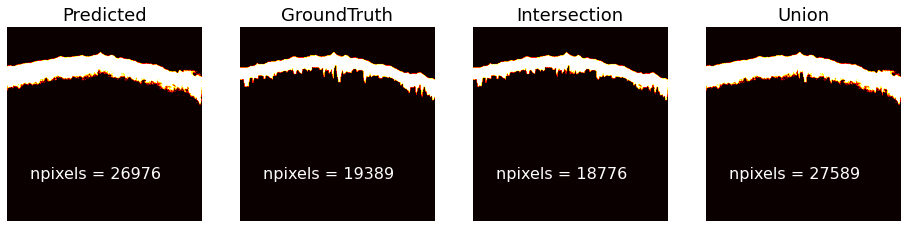

In [43]:
#IOU 
A = np.squeeze(preds_train_t[ix])
B = np.squeeze(Y_train[ix])
intersection = np.logical_and(A, B)
union = np.logical_or(A, B)

fig, axes = plt.subplots(1,4, figsize=(16,9))
axes[0].imshow(A, cmap='hot')
axes[0].annotate('npixels = {}'.format(np.sum(A>0)), 
                 xy=(60, 400), color='white', fontsize=16)
axes[1].imshow(B, cmap='hot')
axes[1].annotate('npixels = {}'.format(np.sum(B>0)), 
                 xy=(60, 400), color='white', fontsize=16)

axes[2].imshow(intersection, cmap='hot')
axes[2].annotate('npixels = {}'.format(np.sum(intersection>0)), 
                 xy=(60, 400), color='white', fontsize=16)

axes[3].imshow(union, cmap='hot')
axes[3].annotate('npixels = {}'.format(np.sum(union>0)), 
                 xy=(60, 400), color='white', fontsize=16)

labels = ['Predicted', 'GroundTruth', 'Intersection', 'Union']
for ind, ax in enumerate(axes):
    ax.set_title(labels[ind], fontsize=18)
    ax.axis('off')

plt.savefig('iou_' + str(train_ids[ix]) + '.png') 

In [44]:
from google.colab import files 
files.download('output_mask_'+ str(train_ids[ix]) + '.png')
files.download('output_ML_mask_'+ str(train_ids[ix]) + '.png')
files.download('ML plot_' + str(train_ids[ix]) + '.png')
files.download('Comparison plot_' + str(train_ids[ix]) + '.png')
files.download('epidermal thickness_'+ str(train_ids[ix]) +'.txt')
files.download('iou_' + str(train_ids[ix]) + '.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
#Train_iou overall
excel_file = Workbook()
sheet = excel_file.active
sheet['A1'] = 'name'
sheet['B1'] = 'iou'

for ix in range(len(preds_train_t)):
  C = np.squeeze(preds_train_t[ix])
  D = np.squeeze(Y_train[ix])
  intersection = np.logical_and(C, D)
  union = np.logical_or(C, D)
  iou = np.sum(intersection>0)/np.sum(union>0)
  cloumnA=str(train_ids[ix])
  sheet.append([cloumnA,iou])
  #print(str(train_ids[ix]) + '\t=\t'+ str(iou))
excel_file.save('train_iou.xlsx')

In [46]:
#train_confusion matrix
excel_file = Workbook()
sheet = excel_file.active
sheet['A1'] = 'name'
sheet['B1'] = 'acc'
sheet['C1'] = 'iou'
sheet['D1'] = 'predition'
sheet['E1'] = 'recall'

for ix in range(len(preds_train_t)):
  ground_truth_labels = Y_train[ix].ravel()
  preds_train_t2 = np.squeeze(preds_train_t)
  predition_labels = preds_train_t2[ix].ravel()
  r = confusion_matrix(y_true=ground_truth_labels, y_pred=predition_labels)
  r = np.flip(r)
  acc = (r[0][0] + r[-1][-1]) / np.sum(r)
  #print('acc='+str(acc))
  iou = (r[0][0]) / (np.sum(r)-(r[-1][-1]))
  #print('iou='+ str(iou))
  predition = r[0][0] / (r[0][0] + r[-1][0])
  #print('predition='+str(predition))
  recall = r[0][0] / (r[0][0] + r[0][-1])
  #print('recall='+str(recall))
  cloumnA=str(train_ids[ix])
  sheet.append([cloumnA,acc,iou,predition,recall])
  #print(str(validation_ids[iv]) + '\t=\t'+ str(iou))
excel_file.save('train_confusion_matrix.xlsx')

In [47]:
iou_metric(np.squeeze(Y_train[ix]), np.squeeze(preds_train_t[ix]), print_table=True)

Thresh	TP	FP	FN	Prec.
0.500	1	129	1	0.008
0.550	1	129	1	0.008
0.600	1	129	1	0.008
0.650	0	130	2	0.000
0.700	0	130	2	0.000
0.750	0	130	2	0.000
0.800	0	130	2	0.000
0.850	0	130	2	0.000
0.900	0	130	2	0.000
0.950	0	130	2	0.000
AP	-	-	-	0.002


0.0022900763358778627

# 接下來是testing data的部分
跟上面的分析方式都一樣

只需注意，在這邊testing data的Ground Truth需額外匯入(可改code)


(10, 512, 512)
alan_face1_173645_0052.pgm


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

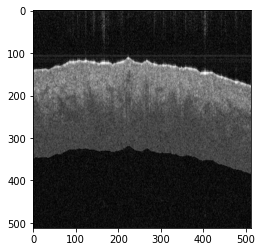

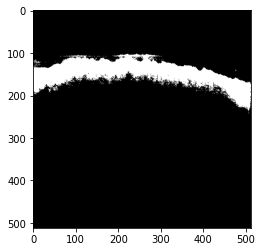

In [48]:
#show the test data
ixx = random.randint(0, len(preds_test_t)) 
print(np.shape(X_test))
print(test_ids[ixx])
plt.figure(1)
plt.imshow(X_test[ixx], vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('test_oct_image.png',X_test[ixx], vmin = 0, vmax = 65535, cmap = 'gray')

plt.figure(2)
plt.imshow(np.squeeze(preds_test_t[ixx]), vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('test_ML_mask.png',np.squeeze(preds_test_t[ixx]), vmin = 0, vmax = 65535, cmap = 'seismic')


(512, 512, 3)
(512, 512, 3)
(512, 512, 3)


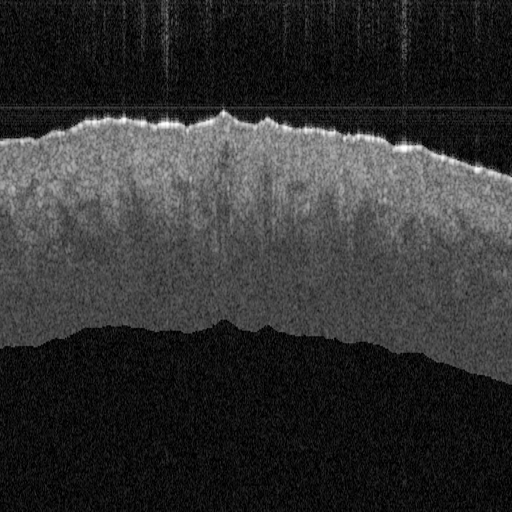

array([[[69, 23, 23],
        [64, 19, 19],
        [78, 32, 32],
        ...,
        [74, 29, 29],
        [56, 11, 11],
        [52,  6,  6]],

       [[69, 23, 23],
        [60, 14, 14],
        [78, 32, 32],
        ...,
        [73, 27, 27],
        [66, 21, 21],
        [53,  7,  7]],

       [[77, 32, 32],
        [62, 16, 16],
        [74, 28, 28],
        ...,
        [73, 27, 27],
        [74, 29, 29],
        [62, 16, 16]],

       ...,

       [[56, 10, 10],
        [56, 11, 11],
        [52,  6,  6],
        ...,
        [66, 21, 21],
        [55,  9,  9],
        [58, 13, 13]],

       [[57, 12, 12],
        [59, 14, 14],
        [53,  7,  7],
        ...,
        [62, 16, 16],
        [57, 12, 12],
        [56, 11, 11]],

       [[60, 14, 14],
        [60, 14, 14],
        [53,  7,  7],
        ...,
        [49,  4,  4],
        [72, 26, 26],
        [64, 18, 18]]], dtype=uint8)

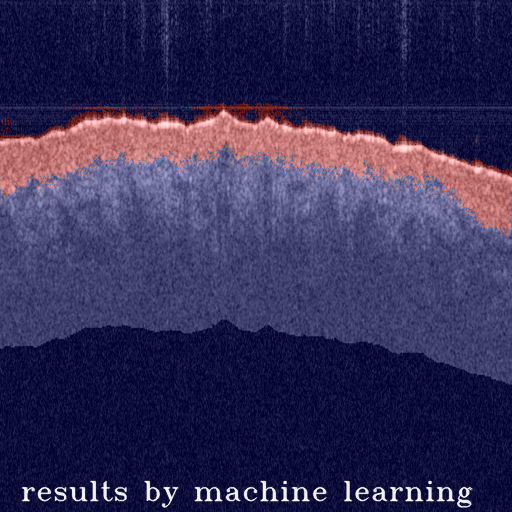

True


alan_face1_173645_0052.pgm


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
#Test dataset
import cv2
from google.colab.patches import cv2_imshow


top_pic = 'test_oct_image.png'
bottom_pic = 'test_ML_mask.png'

top = cv2.imread(top_pic)
bottom = cv2.imread(bottom_pic)
print(np.shape(bottom))
print(np.shape(middle))
print(np.shape(top))
cv2_imshow(top)
overlapping3 = cv2.addWeighted(bottom, 0.6 ,top, 0.9, 0)
cv2.putText(overlapping3, 'results by machine learning', (20, 500), cv2.FONT_HERSHEY_TRIPLEX, 0.9, (255, 255, 255), 1, cv2.LINE_AA)
cv2_imshow(overlapping3)
#plt.imshow(overlapping[:,:,[2,1,0]])
#plt.show()
#plt.imshow(overlapping2[:,:,[2,1,0]])
#plt.show()
cv2.imwrite('test_ML_mask_'+ str(test_ids[ixx]) + '.png' , overlapping3)

print('\n' + test_ids[ixx])

from google.colab import files 
files.download('test_oct_image.png')
files.download('test_ML_mask_'+ str(test_ids[ixx]) + '.png')

(512, 1)

Text(0.5, 1.0, 'Epidermal line for alan_face1_173645_0052.pgm by machine learning')

Text(0, 0.5, 'position(pixel)')

Text(0.5, 0, 'line')

(1.0, 512.0)

(5.0, 300.0)

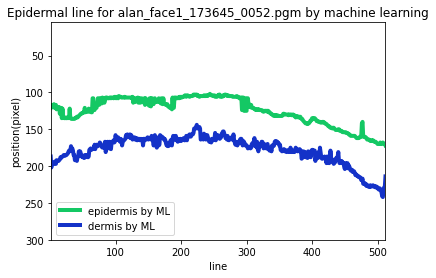

(512, 1)

(512, 1)


epidermal thickness by machine learning: 158.2760224719101 μm


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
#Test dataset
#ML_MASK_results

#draw upper line
eprdermis_linet=np.empty(512)
eprdermis_linet=np.argmax(preds_test_t,axis=1) #y_plot
x_plot_et = np.arange(512) + 1
#index = [0]
#x_plot = np.delete(x_plot,index) 
y_plot_et=np.zeros(512)
y_plot_et = eprdermis_linet[ixx][:]
#print(y_plot)
#print(eprdermis_line[1])
#plt.plot(x_plot_e, y_plot_e,color=(20/255,200/255,100/255),linewidth=3)
#plt.gca().invert_yaxis()
#plt.title("ixth surface line") # title
#plt.ylabel("position(pixel)") # y label
#plt.xlabel("line") # x label
#plt.xlim(1,512)
#plt.show()
np.shape(eprdermis_linet[ixx])

#draw under line
dermis_line_reverset=list(reversed(dermis_linet[ixx]))
y_plot_dt=np.empty(512)
y_plot_dt=np.argmax(dermis_line_reverset,axis=0)
y_plot_dt=abs(y_plot_dt - 511)
x_plot_dt=np.arange(512)+1
#plt.plot(x_plot_d, y_plot_d,color=(100/255,100/255,200/255),linewidth=3)
#plt.gca().invert_yaxis()
#plt.title("ixth EDJ line") # title
#plt.ylabel("position(pixel)") # y label
#plt.xlabel("line") # x label
#plt.xlim(1,512)
#plt.show()

#combine
plt.plot(x_plot_et, y_plot_et,color=(20/255,200/255,100/255),linewidth=4, label="epidermis by ML")
plt.plot(x_plot_dt, y_plot_dt,color=(20/255,50/255,200/255),linewidth=4, label="dermis by ML")
plt.title("Epidermal line for " + str(test_ids[ixx]) + " by machine learning") # title
plt.legend(loc="lower left")
plt.ylabel("position(pixel)") # y label
plt.xlabel("line") # x label
plt.xlim(1,512)
plt.ylim(5,300)
plt.gca().invert_yaxis()
plt.savefig('Test_ML plot_' + str(test_ids[ixx]) + '.png') 
plt.show()

ratio_adjust=0.72 #370->512
np.shape(y_plot_dt)
np.shape(y_plot_et)
pixel_size=5.92*ratio_adjust/1.424
epidermis_thickness=y_plot_dt-y_plot_et
epidermis_thickness=np.sort(epidermis_thickness,axis=None)
#print(epidermis_thickness)
epidermis_thickness=epidermis_thickness[55:455] # 80%

print('\n''epidermal thickness by machine learning:',np.average(np.squeeze(epidermis_thickness))*pixel_size,'μm') #mean
Test_ep_mean_ML=np.average(np.squeeze(epidermis_thickness))*pixel_size

path = 'Test_epidermal thickness_'+ str(test_ids[ixx]) +'.txt'
f = open( path, 'w')
print('\n''epidermis thickness by machine learning:'+ '%.2f' %Test_ep_mean_ML +'μm', file = f) #mean
f.close()

files.download('Test_ML plot_' + str(test_ids[ixx]) + '.png')
files.download('Test_epidermal thickness_'+ str(test_ids[ixx]) +'.txt')


<ipython-input-51-20aa7181e758>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test_ground_truth = np.zeros((1, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)


<Figure size 432x288 with 0 Axes>

(512, 512, 1)


<Figure size 432x288 with 0 Axes>

(10, 512, 512)


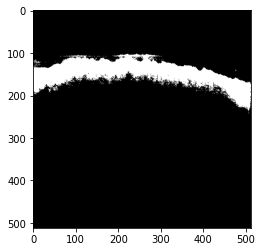

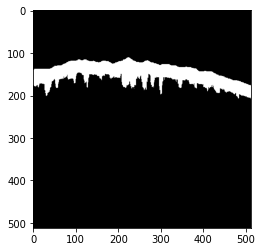

In [51]:
#test iou
#test_predictions = model.predict(X_test)

Y_test_ground_truth = np.zeros((1, IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)


test_mask_ = np.where(Y_test>0 ,65535,0)
#plt.imshow(np.squeeze(test_predictions[ixx]),vmin = 0, vmax = 65535, cmap = 'gray')
plt.figure(3)
plt.imshow(np.squeeze(preds_test_t[ixx]),vmin = 0, vmax = 65535, cmap = 'gray')
print(np.shape(preds_test_t[ixx]))
plt.figure(4)
plt.imshow(test_mask_[ixx], vmin = 0, vmax = 65535, cmap = 'gray')
plt.imsave('test_Matlab_mask.png',np.squeeze(test_mask_[ixx]), vmin = 0, vmax = 65535, cmap = 'PRGn')
print(np.shape(test_mask_))


(512, 512, 3)
(512, 512, 3)


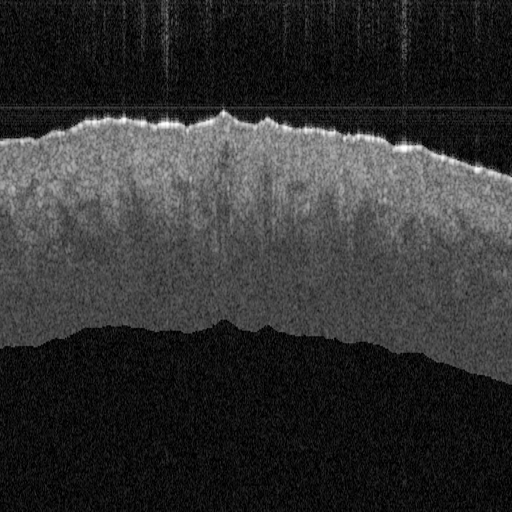

array([[[68, 23, 62],
        [64, 19, 57],
        [77, 32, 71],
        ...,
        [74, 29, 67],
        [56, 11, 49],
        [51,  6, 45]],

       [[68, 23, 62],
        [59, 14, 53],
        [77, 32, 71],
        ...,
        [72, 27, 65],
        [66, 21, 59],
        [52,  7, 46]],

       [[76, 32, 70],
        [61, 16, 55],
        [73, 28, 66],
        ...,
        [72, 27, 65],
        [74, 29, 67],
        [61, 16, 55]],

       ...,

       [[55, 10, 48],
        [56, 11, 49],
        [51,  6, 45],
        ...,
        [66, 21, 59],
        [54,  9, 47],
        [58, 13, 51]],

       [[57, 12, 50],
        [58, 14, 52],
        [52,  7, 46],
        ...,
        [61, 16, 55],
        [57, 12, 50],
        [56, 11, 49]],

       [[59, 14, 53],
        [59, 14, 53],
        [52,  7, 46],
        ...,
        [49,  4, 42],
        [71, 26, 64],
        [63, 18, 56]]], dtype=uint8)

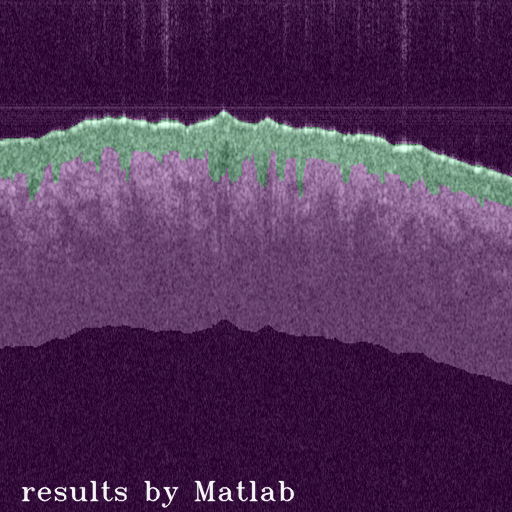

True


alan_face1_173645_0052.pgm


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
#Test dataset
import cv2
from google.colab.patches import cv2_imshow


top_pic = 'test_oct_image.png'
middle_pic = 'test_Matlab_mask.png'


top = cv2.imread(top_pic)
middle = cv2.imread(middle_pic)
print(np.shape(middle))
print(np.shape(top))
cv2_imshow(top)
overlapping4 = cv2.addWeighted(middle, 0.6 ,top, 0.9, 0)
cv2.putText(overlapping4, 'results by Matlab', (20, 500), cv2.FONT_HERSHEY_TRIPLEX, 0.9, (255, 255, 255), 1, cv2.LINE_AA)
cv2_imshow(overlapping4)
#plt.imshow(overlapping[:,:,[2,1,0]])
#plt.show()
#plt.imshow(overlapping2[:,:,[2,1,0]])
#plt.show()
cv2.imwrite('test_Matlab_mask_'+ str(test_ids[ixx]) + '.png' , overlapping4)

print('\n' + test_ids[ixx])

from google.colab import files 
#files.download('test_oct_image.png')
files.download('test_Matlab_mask_'+ str(test_ids[ixx]) + '.png')

Text(60, 400, 'npixels = 24651')

Text(60, 400, 'npixels = 20252')

Text(60, 400, 'npixels = 17735')

Text(60, 400, 'npixels = 27168')

Text(0.5, 1.0, 'Predicted')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5, 1.0, 'Matlab')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5, 1.0, 'Intersection')

(-0.5, 511.5, 511.5, -0.5)

Text(0.5, 1.0, 'Union')

(-0.5, 511.5, 511.5, -0.5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

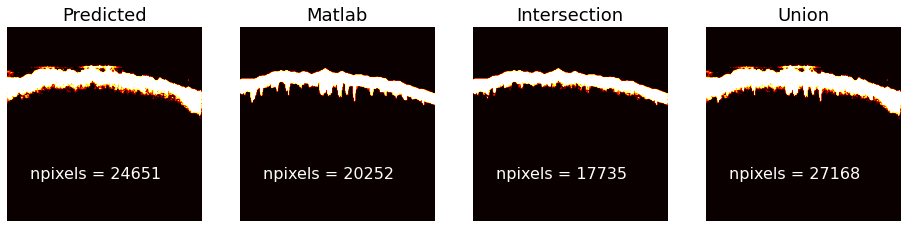

In [53]:
#test iou
A = np.squeeze(preds_test_t[ixx])
B = test_mask_[ixx]
intersection = np.logical_and(A, B)
union = np.logical_or(A, B)

fig, axes = plt.subplots(1,4, figsize=(16,9))
axes[0].imshow(A, cmap='hot')
axes[0].annotate('npixels = {}'.format(np.sum(A>0)), 
                 xy=(60, 400), color='white', fontsize=16)
axes[1].imshow(B, cmap='hot')
axes[1].annotate('npixels = {}'.format(np.sum(B>0)), 
                 xy=(60, 400), color='white', fontsize=16)

axes[2].imshow(intersection, cmap='hot')
axes[2].annotate('npixels = {}'.format(np.sum(intersection>0)), 
                 xy=(60, 400), color='white', fontsize=16)

axes[3].imshow(union, cmap='hot')
axes[3].annotate('npixels = {}'.format(np.sum(union>0)), 
                 xy=(60, 400), color='white', fontsize=16)

labels = ['Predicted', 'Matlab', 'Intersection', 'Union']
for ind, ax in enumerate(axes):
    ax.set_title(labels[ind], fontsize=18)
    ax.axis('off')

plt.savefig('test_iou_' + str(test_ids[ixx]) + '.png') 
files.download('test_iou_' + str(test_ids[ixx]) + '.png')

In [54]:

ground_truth_labels = test_mask_[ixx].ravel()
preds_test_t2 = np.squeeze(preds_test_t)
predition_labels = preds_test_t2[ixx].ravel()
r = confusion_matrix(y_true=ground_truth_labels, y_pred=predition_labels)
r = np.flip(r)
acc = (r[0][0] + r[-1][-1]) / np.sum(r)
print('acc='+str(acc))
iou = (r[0][0]) / (np.sum(r)-(r[-1][-1]))
print('iou='+ str(iou))
predition = r[0][0] / (r[0][0] + r[-1][0])
print('predition='+str(predition))
recall = r[0][0] / (r[0][0] + r[0][-1])
print('recall='+str(recall))
dice = 2*(precision*recall/(recall+precision))
print('dice='+str(dice))


path = 'test_confusion_matrix_'+ str(test_ids[ixx]) +'.txt'
f = open( path, 'w')
print('\n''acc:'+ '%.7f' %acc + '\n' +'iou:'+ '%.7f' %iou +'\n''predition:'+ '%.7f' %predition+'\n''recall:'+ '%.7f' %recall, file = f) #mean
f.close()


files.download('test_confusion_matrix_'+ str(test_ids[ixx]) +'.txt')

acc=0.9640159606933594
iou=0.652790047114252
predition=0.7194434302868038
recall=0.8757159786687735
dice=0.7861545292805839


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
ground_truth_labels = test_mask_.ravel()
preds_test_t2 = np.squeeze(preds_test_t)
predition_labels = preds_test_t2.ravel()

r = confusion_matrix(y_true=all_ground_truth_labels, y_pred=all_predition_labels)
r = np.flip(r)

acc = (r[0][0] + r[-1][-1]) / np.sum(r)
print('acc='+str(acc))

iou = (r[0][0]) / (np.sum(r)-(r[-1][-1]))
print('iou='+ str(iou))

precision = r[0][0] / (r[0][0] + r[-1][0])
print('precision='+str(precision))

recall = r[0][0] / (r[0][0] + r[0][-1])
print('recall='+str(recall))

dice = 2*(precision*recall/(recall+precision))
print('dice='+str(dice))

acc=0.9642391204833984
iou=0.6627271091923008
precision=0.7132126609234343
recall=0.903497155189327
dice=0.7971567980439462


In [56]:
#hausdorff distance
hd=0
hdsum=0
hd95=0
hd95sum=0
assd=0
assdsum=0



for q in range(len(preds_test_t)):
  x1=np.zeros((512), dtype=np.float16)
  x2=np.zeros((2048), dtype=np.float16)

  bri1 = np.zeros((IMG_WIDTH, 2), dtype=np.uint32)
  bri2 = np.zeros((IMG_WIDTH, 2), dtype=np.uint32)

  dermis_line_reverse=list(reversed(preds_test_t[q]))
  y_plot_d=np.empty(512)
  y_plot_d=np.argmax(dermis_line_reverse,axis=0)
  y_plot_d=abs(y_plot_d - 511)
  x_plot_d = np.arange(512) + 1


  dermis_line_reverse_matlab=list(reversed(Y_test[q]))
  y_plot_d_matlab=np.empty(512)
  y_plot_d_matlab=np.argmax(dermis_line_reverse_matlab,axis=0)
  y_plot_d_matlab=abs(y_plot_d_matlab - 511)
  x_plot_d_matlab=np.arange(512)+1

  eprdermis_line=np.empty(512)
  eprdermis_line=np.argmax(preds_test_t,axis=1) #y_plot
  x_plot_e = np.arange(512) + 1
  y_plot_e= np.zeros(512)
  y_plot_e = eprdermis_line[q]

  eprdermis_line_matlab=np.empty(512)
  eprdermis_line_matlab=np.argmax(Y_test,axis=1) #y_plot
  x_plot_e_matlab = np.arange(512) + 1
  y_plot_e_matlab = np.zeros(512)
  y_plot_e_matlab = eprdermis_line_matlab[q]

  for k in range(IMG_WIDTH):
        
          bri1[k][0] = y_plot_d_matlab[k]
          bri1[k][1] = x_plot_d_matlab[k]

  for k in range(IMG_WIDTH):
        
          bri2[k][0] = y_plot_d[k]
          bri2[k][1] = x_plot_d[k]

  for k in range(512):
    for i in range(512):
      x1[i]=cal_distance (bri1[k], bri2[i])
    x2[k]=np.min(x1)
  for k in range(512):
    for i in range(512):
      x1[i]=cal_distance (bri2[k], bri1[i])
    x2[511+k]=np.min(x1)

  for k in range(IMG_WIDTH):
        
          bri1[k][0] = y_plot_e_matlab[k]
          bri1[k][1] = x_plot_e_matlab[k]

  for k in range(IMG_WIDTH):
        
          bri2[k][0] = y_plot_e[k]
          bri2[k][1] = x_plot_e[k]

  for k in range(512):
    for i in range(512):
      x1[i]=cal_distance (bri1[k], bri2[i])
    x2[1023+k]=np.min(x1)
  for k in range(512):
    for i in range(512):
      x1[i]=cal_distance (bri2[k], bri1[i])
    x2[1535+k]=np.min(x1)  

  assdsum=assdsum+np.mean(x2)
  assd=np.mean(x2)
  print("assd=", assd)

  hdsum=hdsum+np.max(x2)
  hd=np.max(x2)
  print('hd=', hd)

  x2=np.sort(x2)
  hd95sum=hd95sum+x2[1946]


hd=hdsum/len(preds_test_t)
hd95=hd95sum/len(preds_test_t)
assd=assdsum/len(preds_test_t)

print(hd)
print(hd95)
print(assd)

assd= 6.61
hd= 109.2
assd= 6.52
hd= 24.77
assd= 7.555
hd= 23.34
assd= 8.56
hd= 98.0
assd= 8.516
hd= 31.0
assd= 8.63
hd= 29.02
assd= 8.43
hd= 33.0
assd= 8.97
hd= 36.0
assd= 8.414
hd= 34.94
assd= 7.9
hd= 36.22
45.546875
17.6859375
8.010546875


In [57]:
#test confusion matrix overall
excel_file = Workbook()
sheet = excel_file.active
sheet['A1'] = 'name'
sheet['B1'] = 'acc'
sheet['C1'] = 'iou'
sheet['D1'] = 'predition'
sheet['E1'] = 'recall'



for ixx in range(len(preds_test_t)):


  ground_truth_labels = test_mask_[ixx].ravel()
  preds_train_t2 = np.squeeze(preds_test_t)
  predition_labels = preds_test_t2[ixx].ravel()
  r = confusion_matrix(y_true=ground_truth_labels, y_pred=predition_labels)
  r = np.flip(r)
  acc = (r[0][0] + r[-1][-1]) / np.sum(r)
  #print('acc='+str(acc))
  iou = (r[0][0]) / (np.sum(r)-(r[-1][-1]))
  #print('iou='+ str(iou))
  predition = r[0][0] / (r[0][0] + r[-1][0])
  #print('predition='+str(predition))
  recall = r[0][0] / (r[0][0] + r[0][-1])
  #print('recall='+str(recall))
  cloumnA=str(test_ids[ixx])
  sheet.append([cloumnA,acc,iou,predition,recall])
  #print(str(validation_ids[iv]) + '\t=\t'+ str(iou))
excel_file.save('test_confusion_matrix.xlsx')

In [58]:
# Perform a sanity check on some random validation samples
#ixx = random.randint(0, len(preds_val_t))
##print(ix)
##imshow(X_train[int(X_train.shape[0]*0.9):][ix])
#plt.figure(1)
#plt.imshow(X_train[int(X_train.shape[0]*0.7):][ixx], vmin = 0, vmax = 65535, cmap = 'gray')

#plt.figure(2)
#plt.imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.7):][ixx]), vmin = 0, vmax = 65535, cmap = 'gray')

#plt.figure(3)
#plt.imshow(np.squeeze(preds_val_t[ixx]), vmin = 0, vmax = 65535, cmap = 'gray')

##imshow(X_train[int(X_train.shape[0]*0.8):][ix])
##plt.show()

##imshow(np.squeeze(preds_val_t[ix]))
##plt.show()
#print('\n' + train_ids[ixx])

In [59]:
#time of prediction 
import time
time_start = time.time()
test_predictions = model.predict(X_test)
time_end = time.time()
time_c = time_end - time_start
print('time cost',time_c , 's')

1/1 [==============================] - 0s 22ms/step
time cost 0.3550534248352051 s


In [60]:
iv = random.randint(0, len(preds_val_t))
np.squeeze(preds_val_t[iv])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])